# Exploratory Data Analysis

___

### Table Of Contents

1. 
2. 
3. 
4. 
5. 
6. 
7. 
8. 
9. 
10. 

___

### 1. Import Libraries

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import requests
import json
import sklearn
from scipy import stats
from scipy.stats import norm
from sklearn.utils import resample
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from wordcloud import WordCloud
import random
from collections import Counter

___

### 2. Expand maximum range of rows

Lots of incoming data from the Spoonacular API.<br>
It is probably a good idea to expand the max range of rows/columns/width to view in Pandas.<br>
Use <b>pd.set_option()</b>

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

___

### 3. Import data

#### Let's edit the DataFrame to sort by "Likes" in descending order for each recipe

In [81]:
#read in .csv file
df = pd.read_csv('/Users/alexandercheng/Desktop/code/projects/recipe-strategy/Data/Recipes.csv', index_col=0)

#make all column names lowercase for ease and consistency
df.columns = map(str.lower, df.columns)

#let's sort the data by "aggregatelikes" so we can see most "liked" recipes at the top.
df = df.sort_values(by=['aggregatelikes'], ascending=False)

#reset index
df = df.reset_index(drop=True)

#preview dataframe
df.head()

,aggregatelikes,analyzedinstructions,cookingminutes,dairyfree,diets,dishtypes,extendedingredients,glutenfree,healthscore,id,instructions,ketogenic,lowfodmap,num_ingredients,preparationminutes,priceperserving,readyinminutes,servings,spoonacularscore,spoonacularsourceurl,sustainable,title,vegan,vegetarian,veryhealthy,verypopular,weightwatchersmartpoints,whole30,calories,fat,saturated_fat,carbohydrates,sugar,cholesterol,sodium,protein,vitamin_k,vitamin_a,vitamin_c,manganese,folate,fiber,copper,magnesium,phosphorus,vitamin_b6,potassium,vitamin_b1,iron,vitamin_b2,vitamin_e,zinc,vitamin_b5,vitamin_b3,calcium,selenium
0,1053360,"[{'name': '', 'steps': [{'number': 1, 'step': ...",10.0,False,"['gluten free', 'primal']",['side dish'],"[{'id': 10011090, 'aisle': 'Produce', 'image':...",True,61.0,702811,Preheat oven to 425 degrees F. Lightly oil a b...,False,False,6,5.0,49.95,15,6,100.0,https://spoonacular.com/garlic-parmesan-roaste...,False,Garlic Parmesan Roasted Broccoli,False,False,True,True,2.0,False,120.85,8.52,1.70,8.67,2.11,2.83,298.49,4.83,119.53,739.49,103.71,0.27,72.79,3.01,0.06,26.45,107.22,0.23,375.45,0.09,0.94,0.15,1.91,0.61,0.69,0.75,106.74,4.06
1,757517,"[{'name': '', 'steps': [{'number': 1, 'step': ...",NaN,True,"['gluten free', 'dairy free', 'paleolithic', '...","['lunch', 'main course', 'main dish', 'dinner']","[{'id': 11052, 'aisle': 'Produce', 'image': 'g...",True,100.0,773578,Preheat oven to 400 degrees. Bring a pot of wa...,False,True,7,NaN,618.59,45,4,100.0,https://spoonacular.com/pesto-salmon-and-itali...,False,Pesto Salmon and Italian Veggies in Foil,False,False,True,True,7.0,True,395.76,20.27,3.20,16.03,8.34,94.75,423.42,38.12,31.79,2334.19,35.43,0.47,108.05,5.50,0.59,98.08,422.85,1.69,1418.14,0.55,3.25,0.82,1.71,1.63,3.26,15.12,109.29,62.94
2,695887,"[{'name': '', 'steps': [{'number': 1, 'step': ...",15.0,False,['gluten free'],['side dish'],"[{'id': 11352, 'aisle': 'Produce', 'image': 'n...",True,95.0,860943,"Preheat oven to 400 degrees F.In a small bowl,...",False,False,8,10.0,165.55,25,4,100.0,https://spoonacular.com/garlic-parmesan-brocco...,False,Garlic Parmesan Broccoli and Potatoes in Foil,False,False,True,True,6.0,False,269.85,12.93,2.60,33.04,3.92,4.25,310.43,9.64,222.01,1300.73,177.46,0.64,131.81,7.56,0.23,69.49,226.73,0.68,1056.65,0.22,2.86,0.27,3.10,1.28,1.37,2.40,194.54,6.38
3,462647,"[{'name': '', 'steps': [{'number': 1, 'step': ...",NaN,True,"['gluten free', 'dairy free', 'whole 30', 'pes...",[],"[{'id': 1022009, 'aisle': 'Ethnic Foods;Spices...",True,100.0,622596,"Mix the salt, chili powder, cumin, paprika, on...",False,False,12,NaN,576.41,10,4,100.0,https://spoonacular.com/whole30-grilled-salmon...,False,Whole30 grilled salmon with avocado salsa,False,False,True,True,10.0,True,450.17,25.51,3.82,8.29,1.30,124.74,303.93,46.54,14.71,545.03,10.76,0.23,102.45,4.22,0.69,87.71,493.63,2.03,1432.72,0.57,2.72,0.95,1.87,1.90,4.54,18.86,50.05,83.29
4,429230,"[{'name': '', 'steps': [{'number': 1, 'step': ...",15.0,True,"['gluten free', 'dairy free', 'fodmap friendly...","['lunch', 'main course', 'main dish', 'dinner']","[{'id': 1002046, 'aisle': 'Condiments', 'image...",True,87.0,667231,"In a small bowl, mix together: 2 Tbsp chopped ...",False,True,6,10.0,392.99,25,4,100.0,https://spoonacular.com/baked-salmon-with-garl...,False,Baked Salmon with Garlic and Dijon,False,False,True,True,4.0,True,245.64,10.90,1.68,0.90,0.27,93.55,387.98,33.93,31.19,230.26,6.39,0.04,47.24,0.00,0.43,51.79,344.16,1.40,856.79,0.40,1.53,0.65,0.00,1.13,2.86,13.41,25.21,62.72


___

### 4. Get Quick Metrics Of Data

In [87]:
#lets see the types of information we have in the dataframe:
df = df.drop(['cookingminutes', 'preparationminutes', 'instructions'],axis=1)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 53 columns):
aggregatelikes              1000 non-null int64
analyzedinstructions        1000 non-null object
dairyfree                   1000 non-null bool
diets                       1000 non-null object
dishtypes                   1000 non-null object
extendedingredients         1000 non-null object
glutenfree                  1000 non-null bool
healthscore                 1000 non-null float64
id                          1000 non-null int64
ketogenic                   1000 non-null bool
lowfodmap                   1000 non-null bool
num_ingredients             1000 non-null int64
priceperserving             1000 non-null float64
readyinminutes              1000 non-null int64
servings                    1000 non-null int64
spoonacularscore            1000 non-null float64
spoonacularsourceurl        1000 non-null object
sustainable                 1000 non-null bool
title                   

In [89]:
#let's see the overall metrics of the information in the dataframe:
df.describe()

,aggregatelikes,healthscore,id,num_ingredients,priceperserving,readyinminutes,servings,spoonacularscore,weightwatchersmartpoints,calories,fat,saturated_fat,carbohydrates,sugar,cholesterol,sodium,protein,vitamin_k,vitamin_a,vitamin_c,manganese,folate,fiber,copper,magnesium,phosphorus,vitamin_b6,potassium,vitamin_b1,iron,vitamin_b2,vitamin_e,zinc,vitamin_b5,vitamin_b3,calcium,selenium
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,1.326577e+04,91.509000,5.957219e+05,9.701000,223.910970,35.596000,3.939000,100.0,7.684000,338.380930,14.385450,2.664490,40.029320,9.905590,17.717840,423.872570,16.563590,240.729130,7178.288250,88.93055,1.267570,162.216010,9.151950,0.777150,108.295720,284.196900,0.716100,1038.120980,0.364030,4.418690,0.38905,3.14931,2.088280,1.55342,5.245850,179.330550,16.976600
std,6.138746e+04,12.010669,1.753658e+05,3.569922,149.494085,53.708728,2.501107,0.0,5.526906,177.759375,12.505991,3.215749,22.239141,8.519329,43.611803,424.320054,12.709377,295.627605,9110.165078,79.94868,0.803492,128.673882,6.235128,0.805325,61.779774,170.308117,0.521457,511.461981,0.279979,6.722757,0.34414,3.04859,1.422605,1.63289,6.821496,140.951136,22.948999
min,3.600000e+01,48.000000,7.835000e+03,3.000000,29.130000,1.000000,1.000000,100.0,0.000000,18.330000,0.460000,0.050000,0.900000,0.020000,0.000000,5.150000,1.470000,0.000000,0.000000,0.00000,0.020000,0.000000,0.000000,0.030000,17.880000,30.540000,0.050000,96.440000,0.020000,0.450000,0.04000,0.00000,0.230000,0.00000,0.220000,16.850000,0.000000
25%,5.220000e+02,85.000000,5.091368e+05,7.000000,118.975000,12.000000,2.000000,100.0,3.000000,200.957500,5.657500,0.985000,20.875000,4.132500,0.000000,192.537500,7.077500,41.312500,1530.310000,33.81250,0.660000,79.650000,4.675000,0.360000,68.355000,151.930000,0.370000,670.025000,0.190000,2.327500,0.18000,1.44000,1.107500,0.67000,1.880000,83.825000,2.687500
50%,1.306000e+03,100.000000,5.841750e+05,9.000000,177.905000,30.000000,4.000000,100.0,7.000000,319.810000,11.335000,1.870000,37.490000,7.405000,0.000000,311.905000,13.225000,136.100000,4506.620000,71.21000,1.095000,125.795000,7.690000,0.570000,94.025000,253.780000,0.550000,939.750000,0.310000,3.585000,0.29000,2.45500,1.800000,1.05000,3.185000,134.995000,6.050000
75%,4.163250e+03,100.000000,7.152728e+05,12.000000,284.217500,45.000000,4.000000,100.0,11.000000,440.610000,18.820000,3.352500,58.197500,13.010000,13.050000,540.110000,21.515000,315.797500,9092.065000,117.32000,1.722500,211.635000,12.152500,0.930000,139.482500,384.505000,0.850000,1303.767500,0.470000,5.452500,0.47000,3.99500,2.692500,1.87250,5.802500,223.260000,20.192500
max,1.053360e+06,100.000000,1.046984e+06,26.000000,988.370000,600.000000,32.000000,100.0,38.000000,1035.660000,76.730000,45.760000,91.730000,51.720000,782.450000,7054.600000,75.060000,2227.340000,98344.220000,865.94000,4.960000,1502.400000,42.150000,9.750000,861.100000,1488.140000,3.950000,3748.380000,3.880000,198.750000,4.04000,38.93000,15.270000,18.24000,144.050000,1051.830000,137.450000


In [90]:
#lets see the breakdown of how recipes fall into different diet "buckets"

display(df['veryhealthy'].value_counts())
display(df['vegetarian'].value_counts())
display(df['vegan'].value_counts())
display(df['glutenfree'].value_counts())
display(df['dairyfree'].value_counts())
display(df['whole30'].value_counts())

True     996
False      4
Name: veryhealthy, dtype: int64

True     628
False    372
Name: vegetarian, dtype: int64

False    523
True     477
Name: vegan, dtype: int64

True     829
False    171
Name: glutenfree, dtype: int64

True     763
False    237
Name: dairyfree, dtype: int64

False    761
True     239
Name: whole30, dtype: int64

___

### 5. Plot Predictors Versus Target (Likes) To Get A Sense Of The Data 

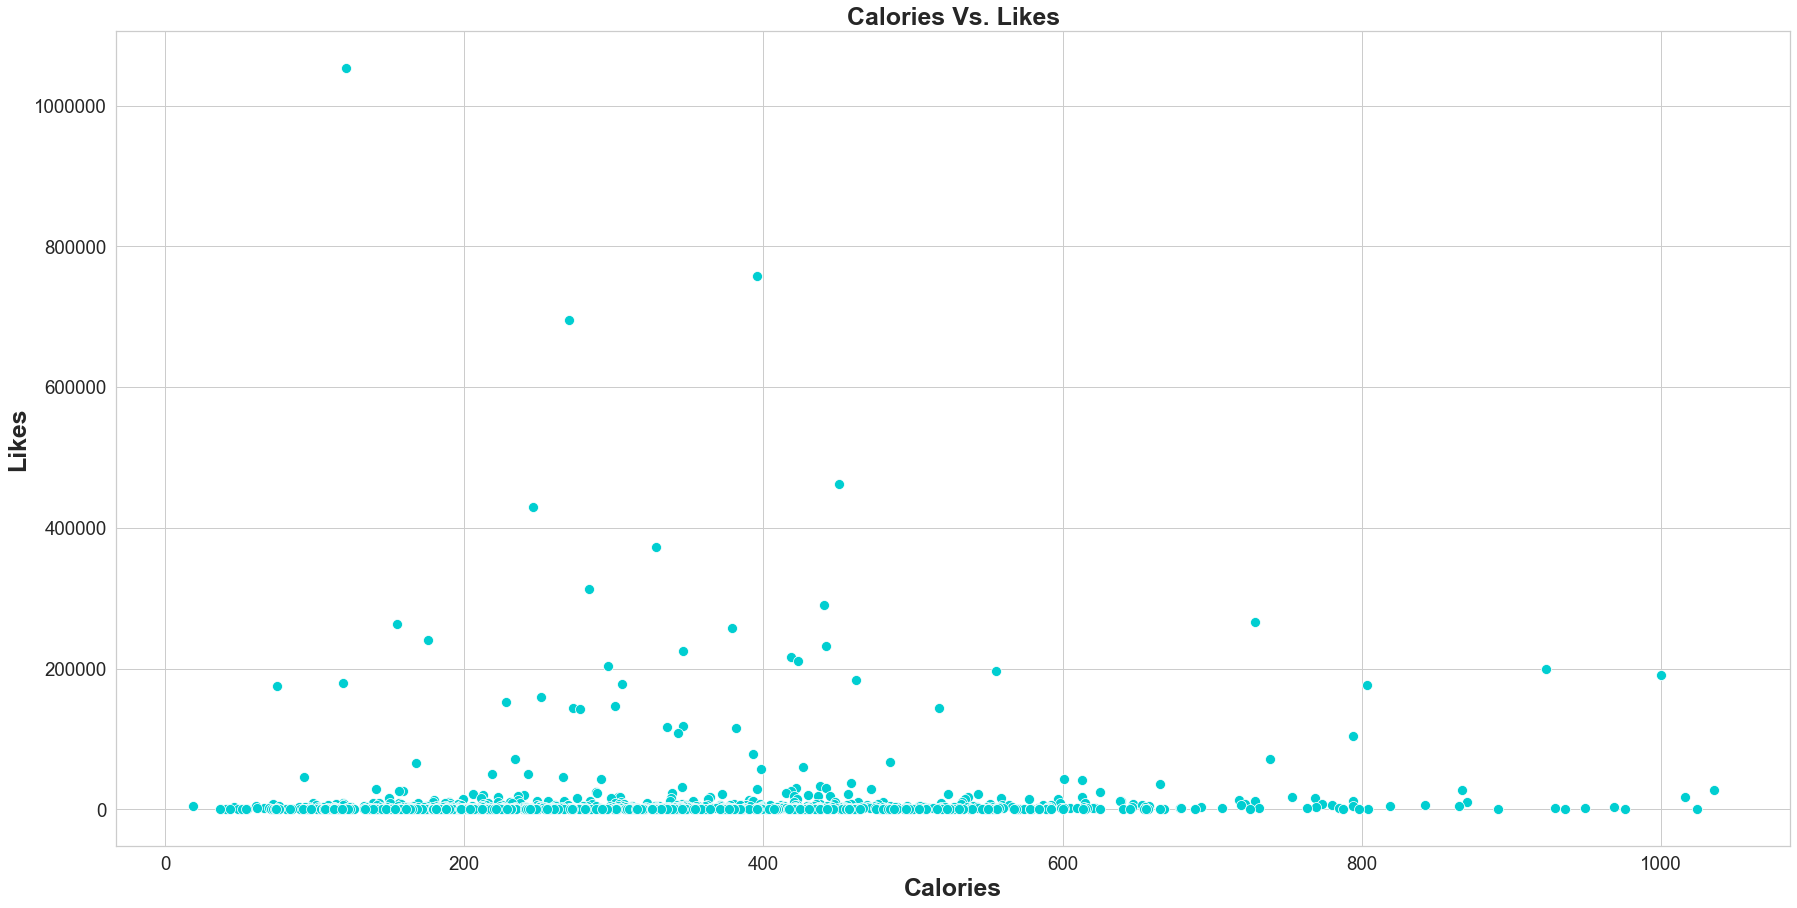

In [159]:
#scatterplot of "calories" vs "aggregatelikes"

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="calories", y="aggregatelikes", color='darkturquoise', s=100, data=df)
plt.xlabel('Calories', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Calories Vs. Likes', fontsize=25, weight = 'bold')
plt.show()

# plt.savefig('calories_versus_likes.pdf', dpi=300)

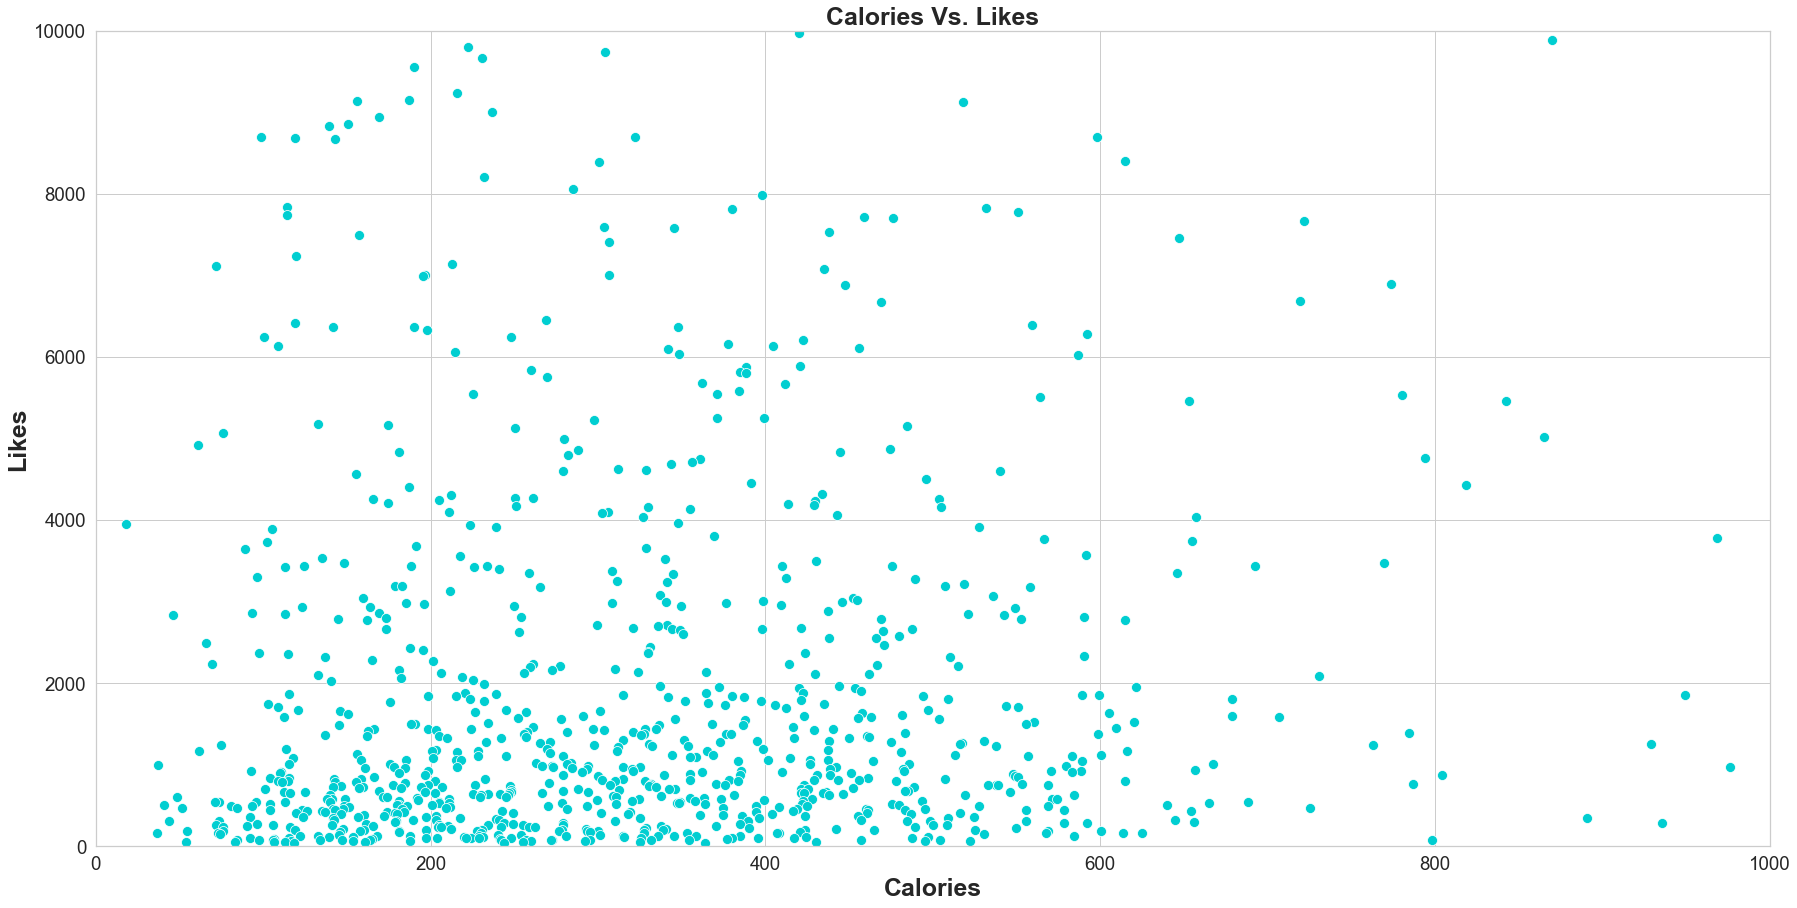

In [160]:
#scatterplot of "calories" vs "aggregatelikes" when "Likes" (y-axis) is less than 10,000 per recipe

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="calories", y="aggregatelikes", color='darkturquoise', s=100, data=df)
plt.xlabel('Calories', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Calories Vs. Likes', fontsize=25, weight = 'bold')

#the plot of Calories Vs. Likes looks very different when "Likes" (y-axis) is less than 10,000 per recipe
plt.axis([0,1000,0,10000])
plt.show()

# plt.savefig('calories_versus_likes_10000.pdf', dpi=300)

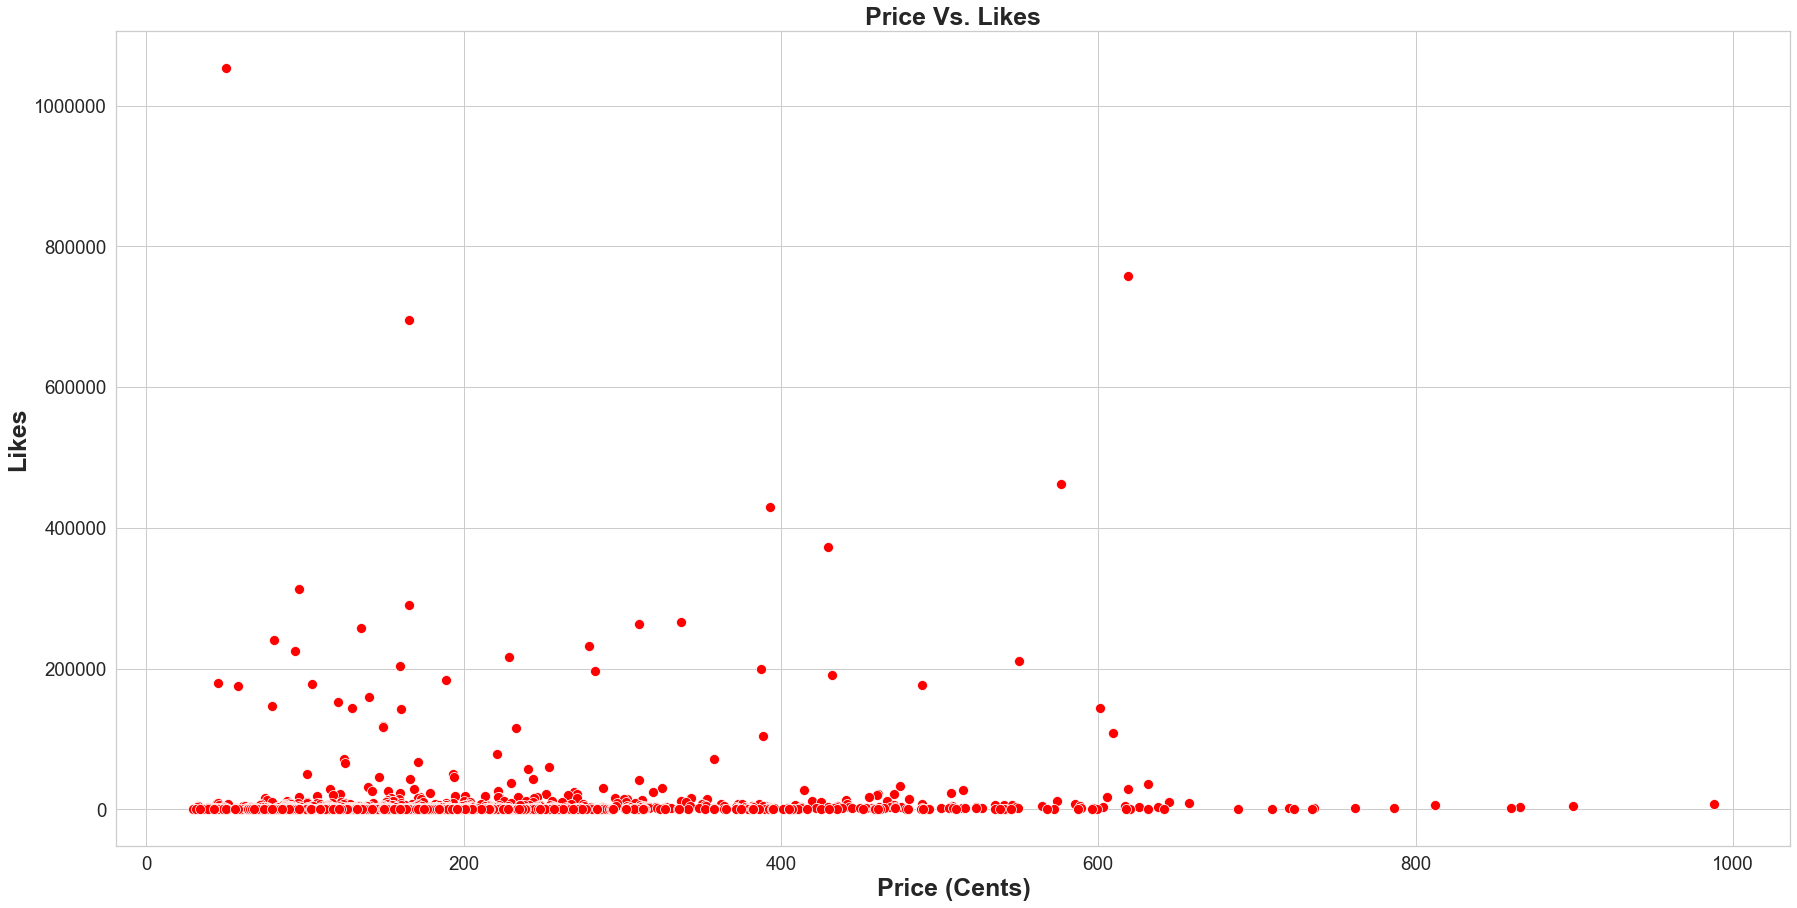

In [161]:
#scatterplot of "priceperserving" vs "aggregatelikes"

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="priceperserving", y="aggregatelikes", color='red', s=100, data=df)
plt.xlabel('Price (Cents)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Price Vs. Likes', fontsize=25, weight = 'bold')
plt.show()

# plt.savefig('price_versus_likes.pdf', dpi=300)

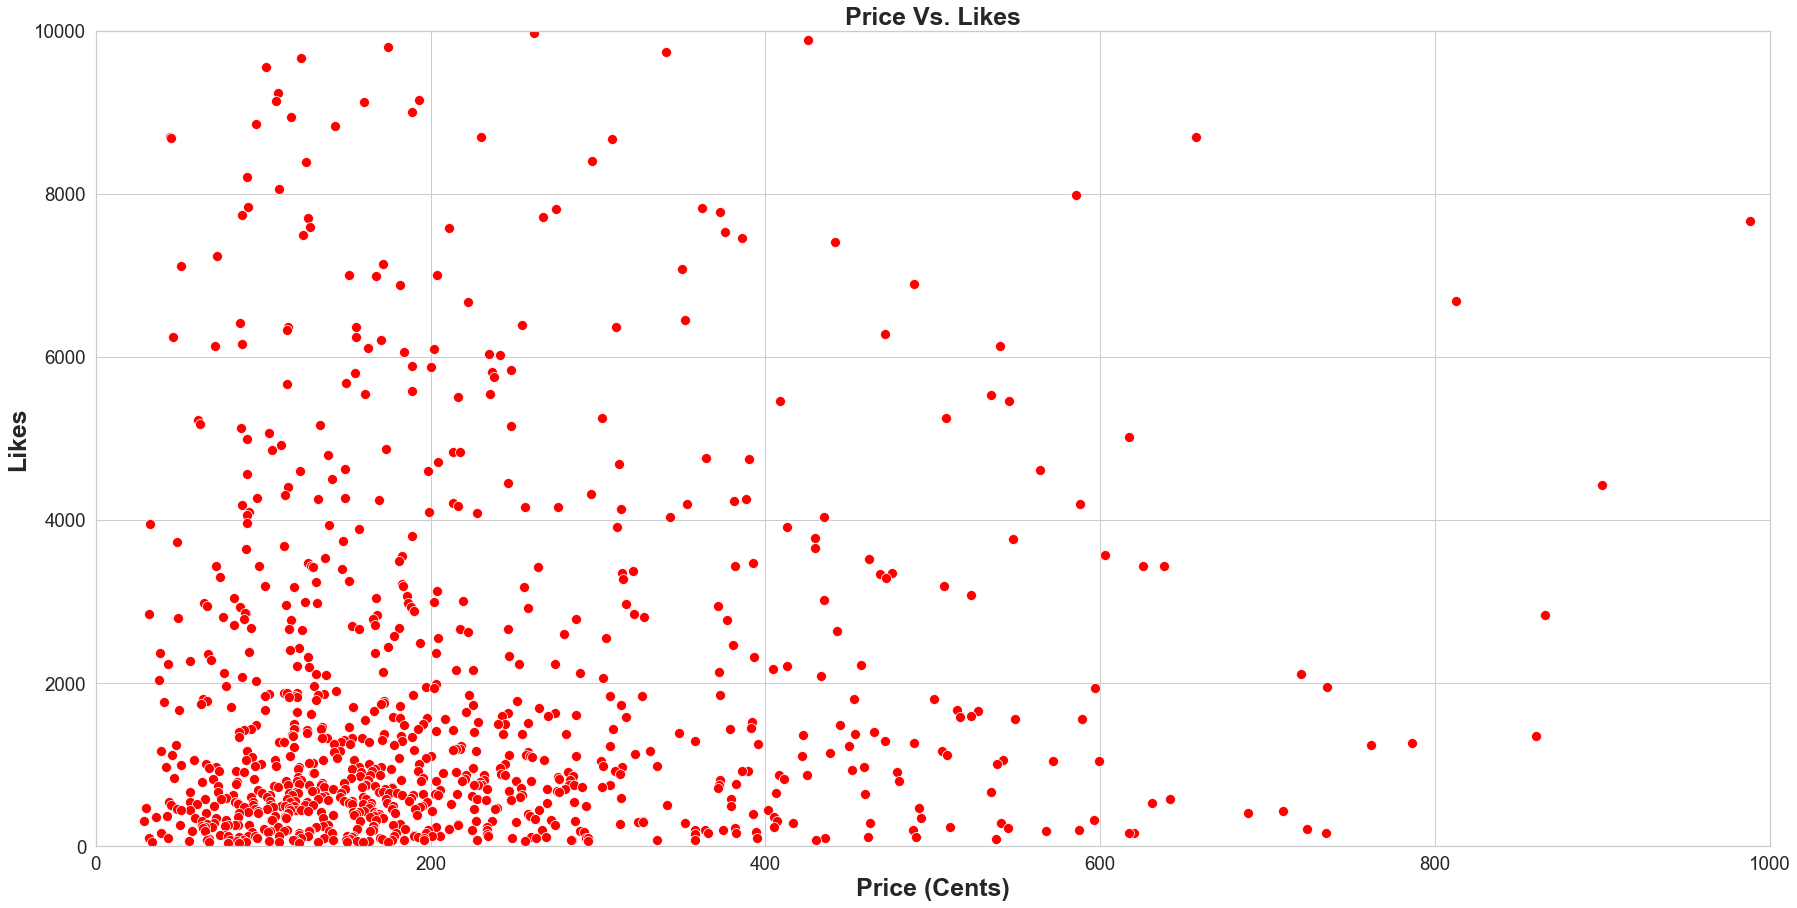

In [162]:
#scatterplot of "priceperserving" vs "aggregatelikes" when "Likes" (y-axis) is less than 10,000 per recipe

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="priceperserving", y="aggregatelikes", color='red', s=100, data=df)
plt.xlabel('Price (Cents)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Price Vs. Likes', fontsize=25, weight = 'bold')

#the plot of Price Vs. Likes looks very different when "Likes" (y-axis) is less than 10,000 per recipe
plt.axis([0,1000,0,10000])
plt.show()

# plt.savefig('price_versus_likes_10000.pdf', dpi=300)

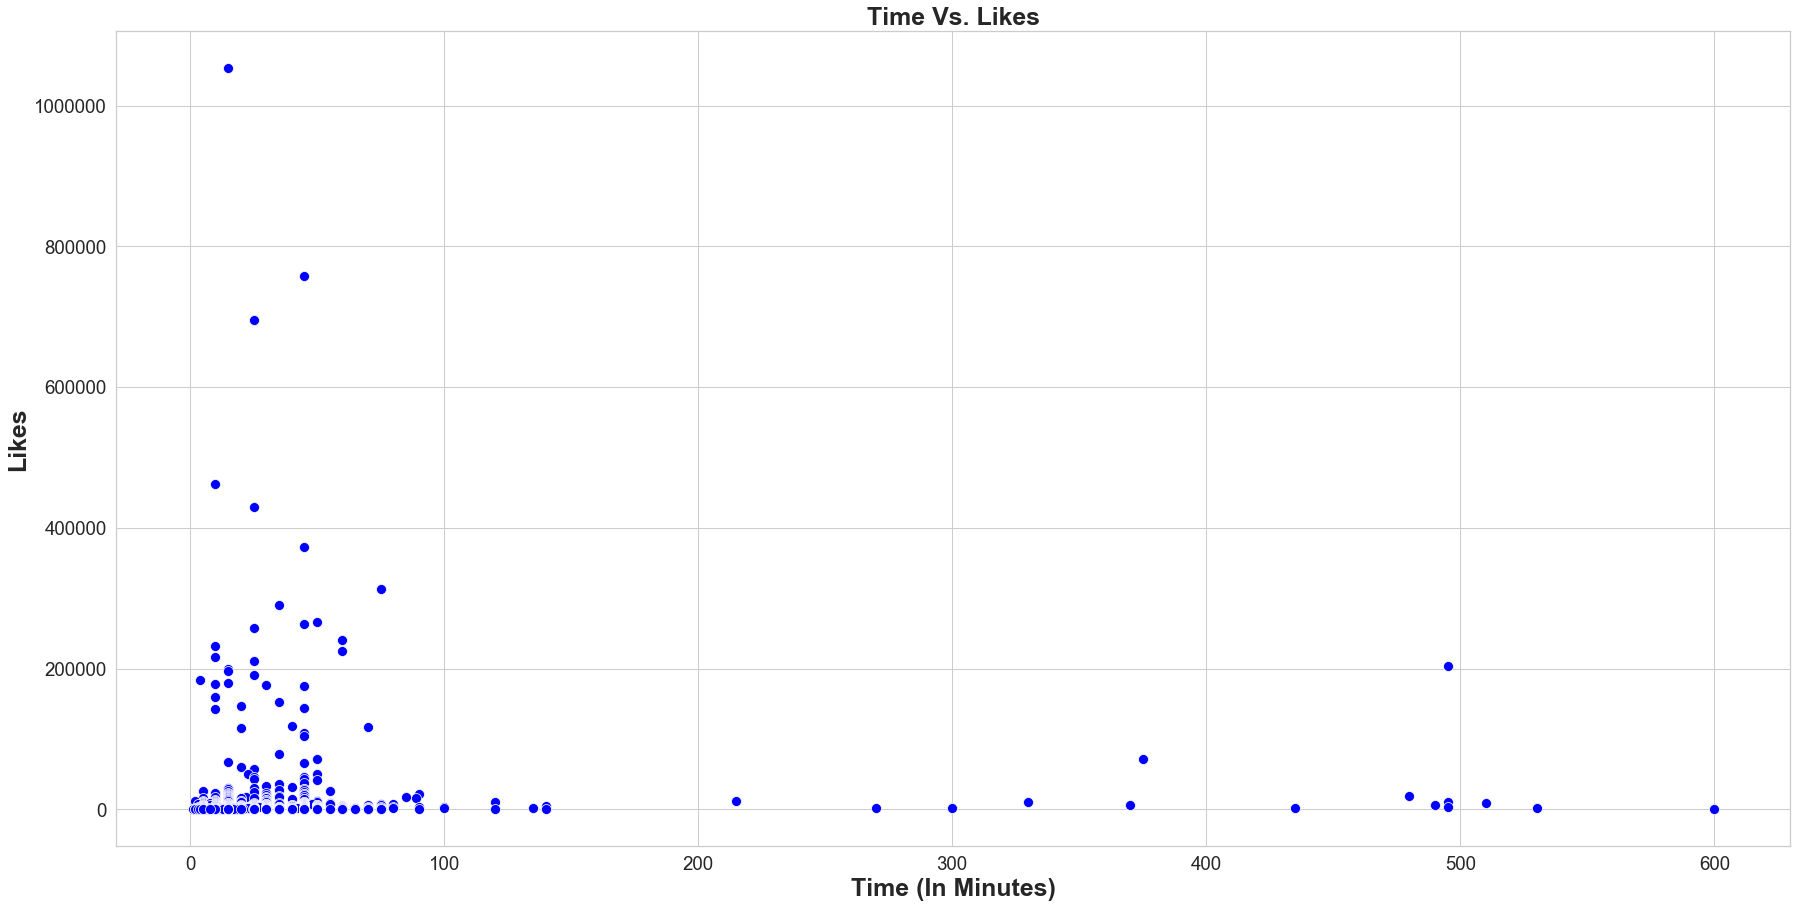

In [163]:
#scatterplot of "readyinminutes" vs "aggregatelikes"

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="readyinminutes", y="aggregatelikes", color='blue', s=100, data=df)
plt.xlabel('Time (In Minutes)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Time Vs. Likes', fontsize=25, weight = 'bold')
plt.show()

# plt.savefig('time_versus_likes.pdf', dpi=300)

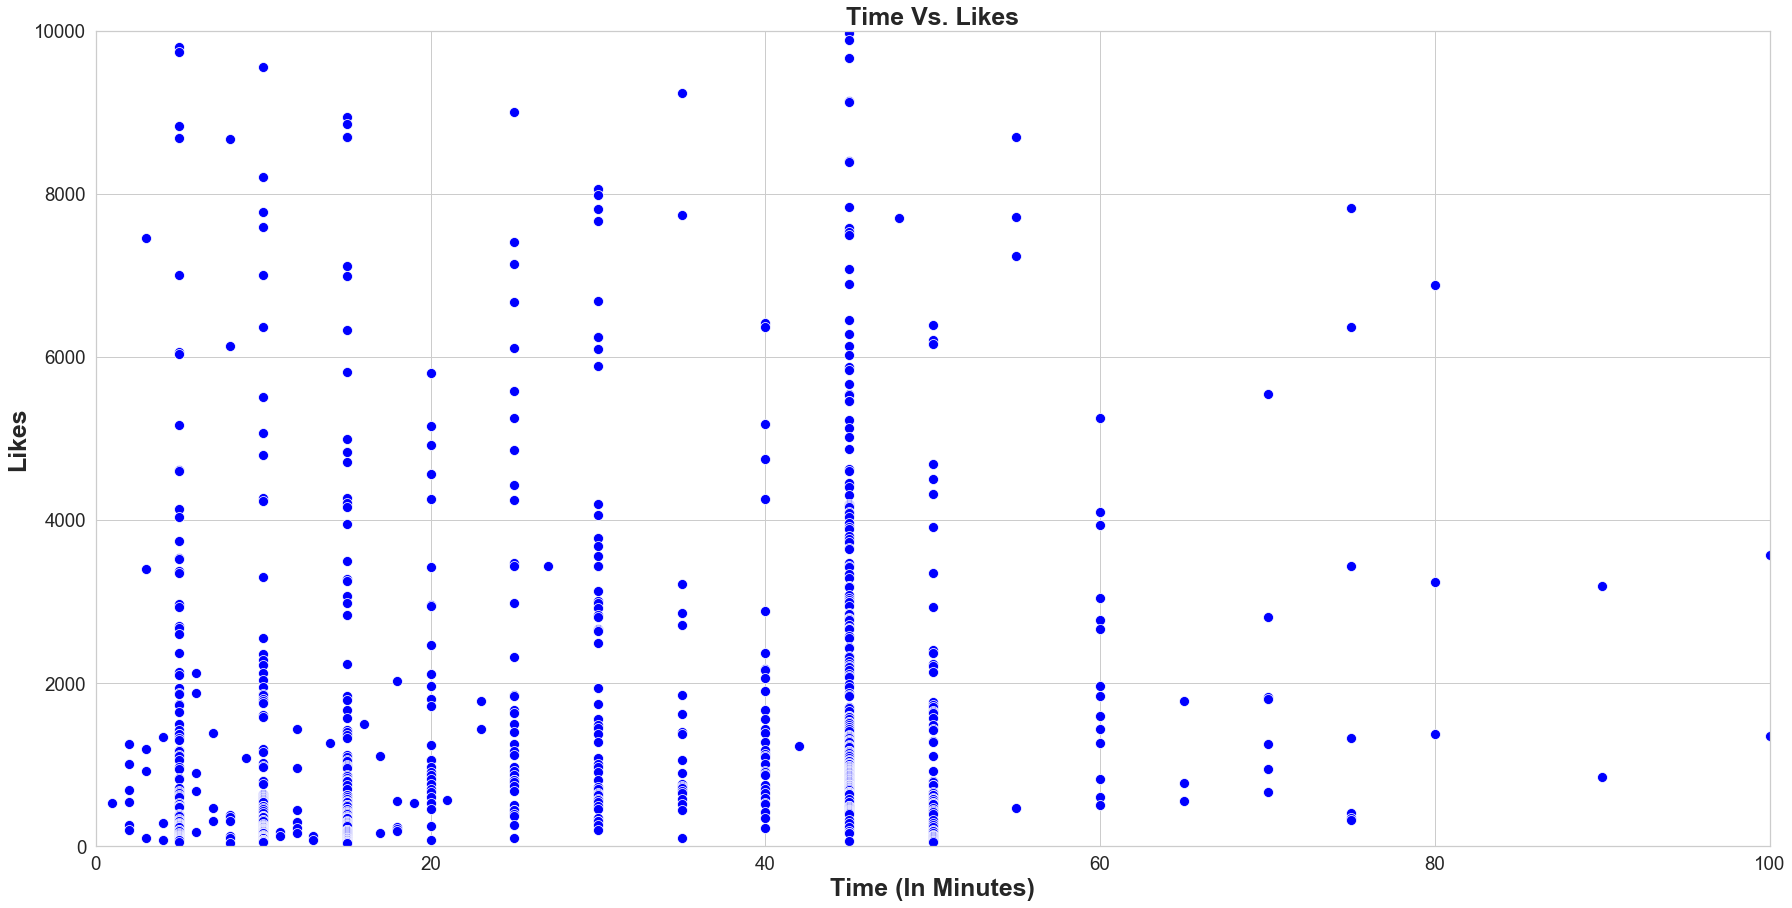

In [164]:
#scatterplot of "readyinminutes" vs "aggregatelikes" with x less than 100, and y less than 10,000

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="readyinminutes", y="aggregatelikes", color='blue', s=100, data=df)
plt.xlabel('Time (In Minutes)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Time Vs. Likes', fontsize=25, weight = 'bold')

#the plot of Time Vs. Likes looks very different when "Time" (x-axis)is less than 100 minutes
#and "Likes" (y-axis) is less than 10,000 per recipe
plt.axis([0,100,0,10000])
plt.show()

# plt.savefig('time_versus_likes_10000.pdf', dpi=300)

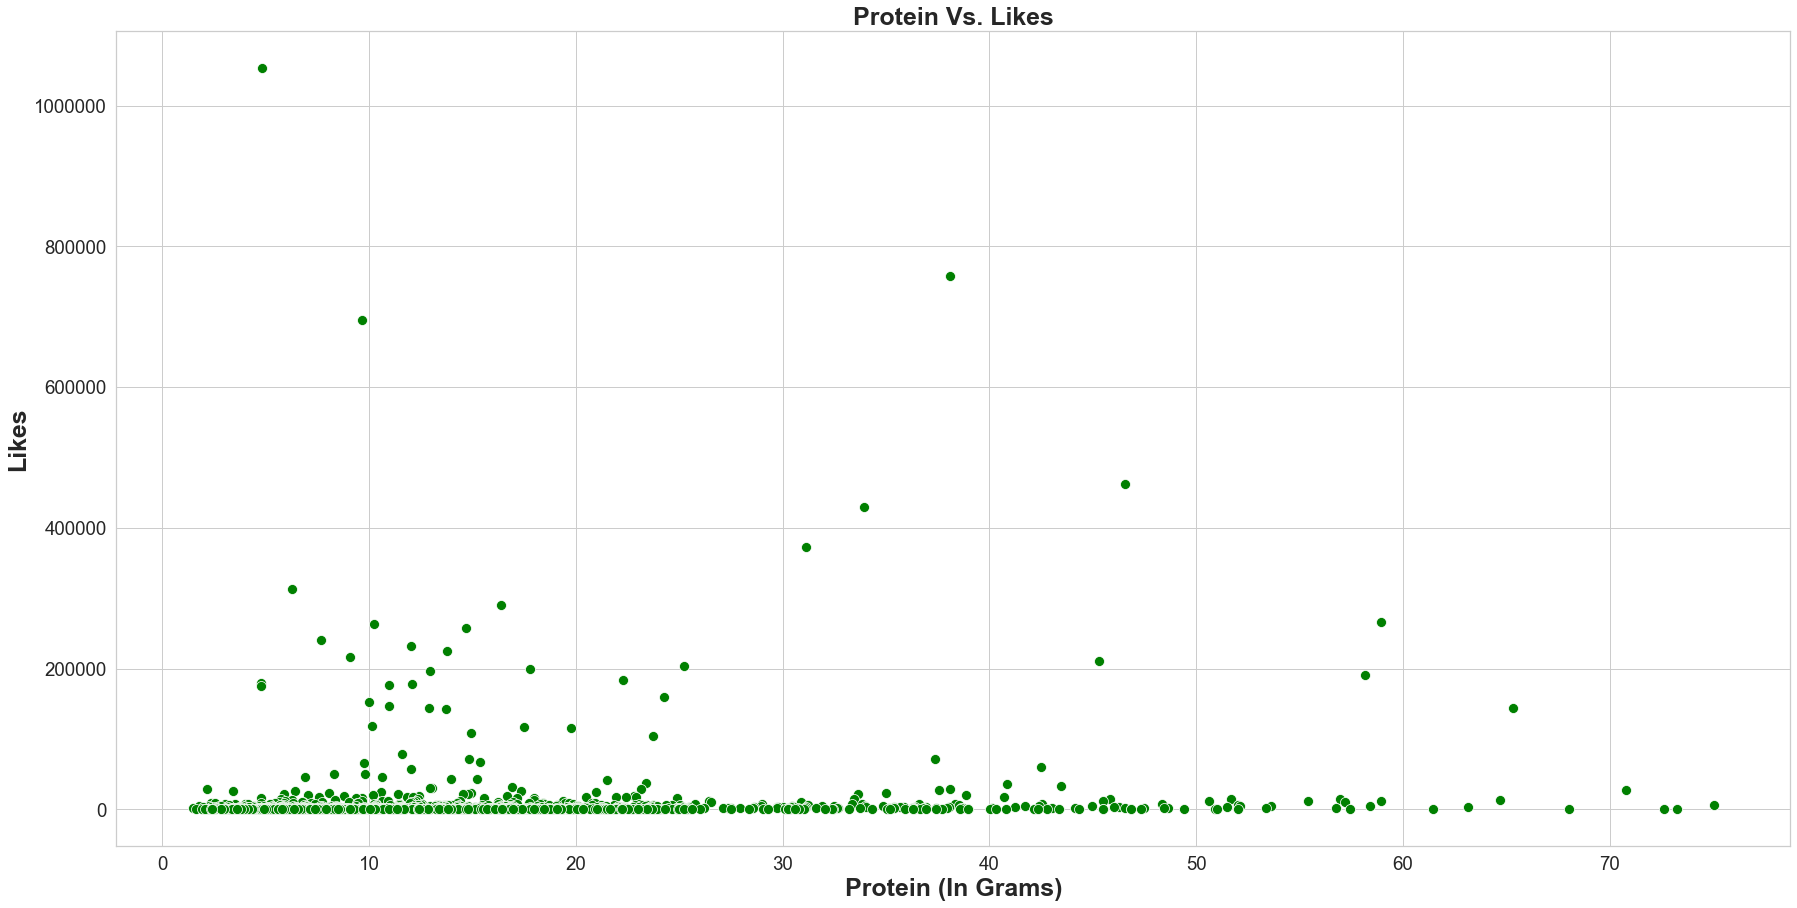

In [165]:
#scatterplot of "protein" vs "aggregatelikes"

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="protein", y="aggregatelikes", color='green', s=100, data=df)
plt.xlabel('Protein (In Grams)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Protein Vs. Likes', fontsize=25, weight = 'bold')
plt.show()

# plt.savefig('protein_versus_likes.pdf', dpi=300)

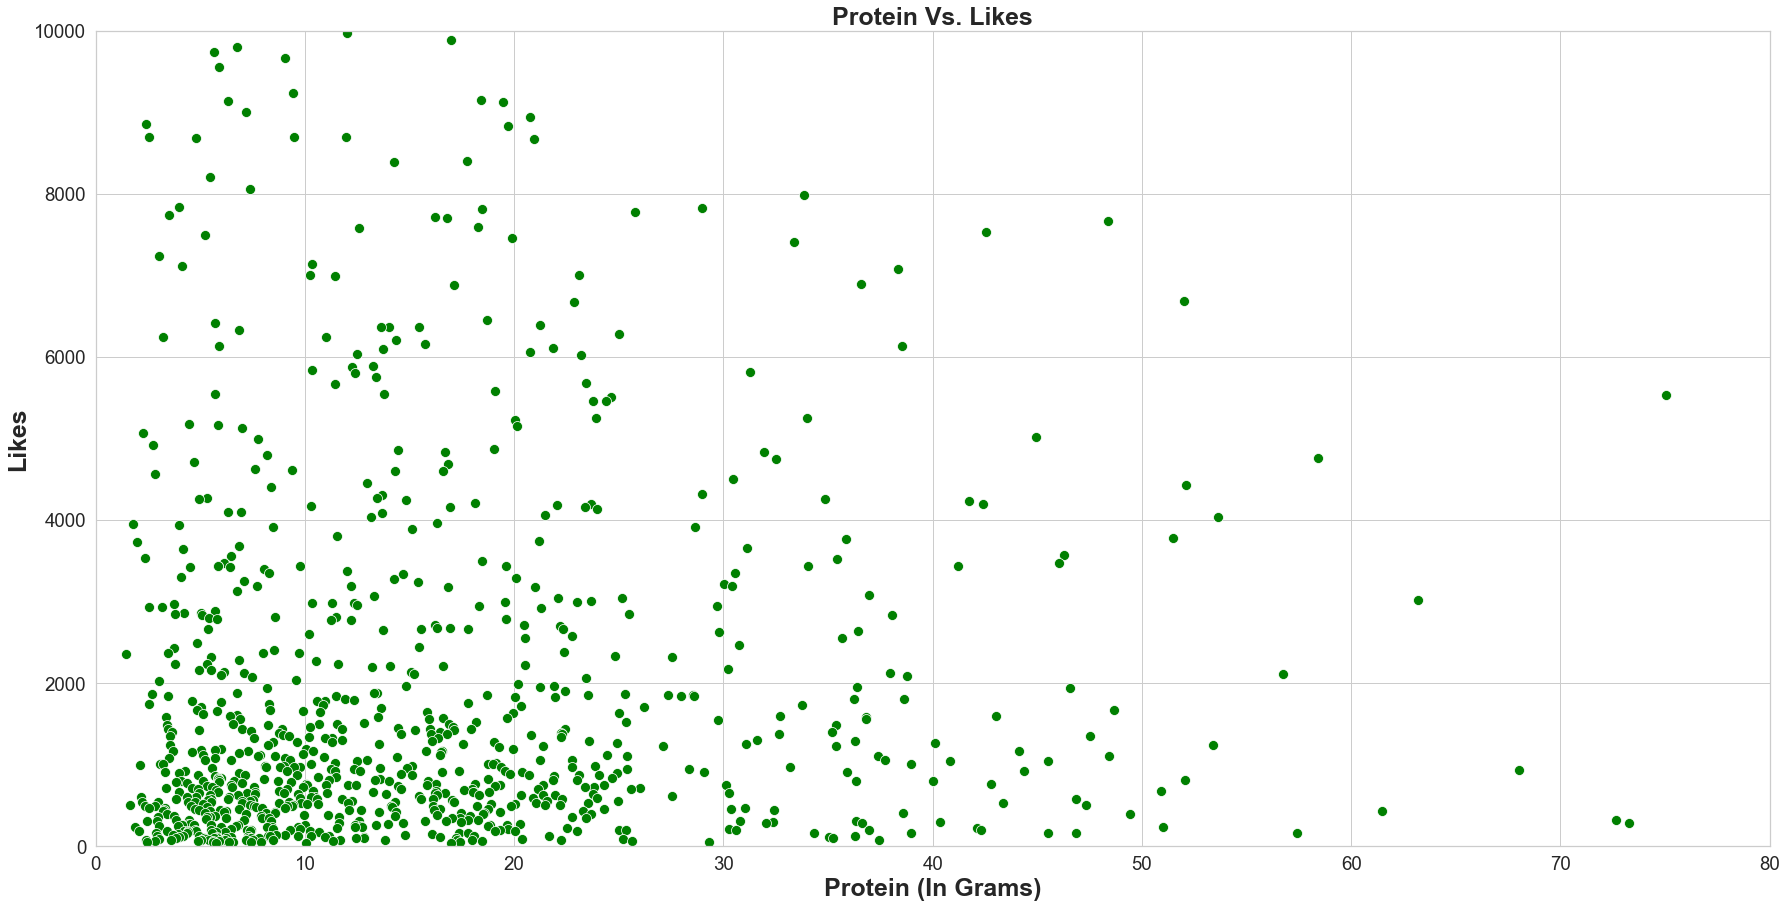

In [166]:
#scatterplot of "protein" vs "aggregatelikes" with y less than 10,000

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="protein", y="aggregatelikes", color='green', s=100, data=df)
plt.xlabel('Protein (In Grams)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Protein Vs. Likes', fontsize=25, weight = 'bold')

#the plot of Protein Vs. Likes looks very different when "Likes" (y-axis) is less than 10,000 per recipe
plt.axis([0,80,0,10000])
plt.show()

# plt.savefig('protein_versus_likes_10000.pdf', dpi=300)

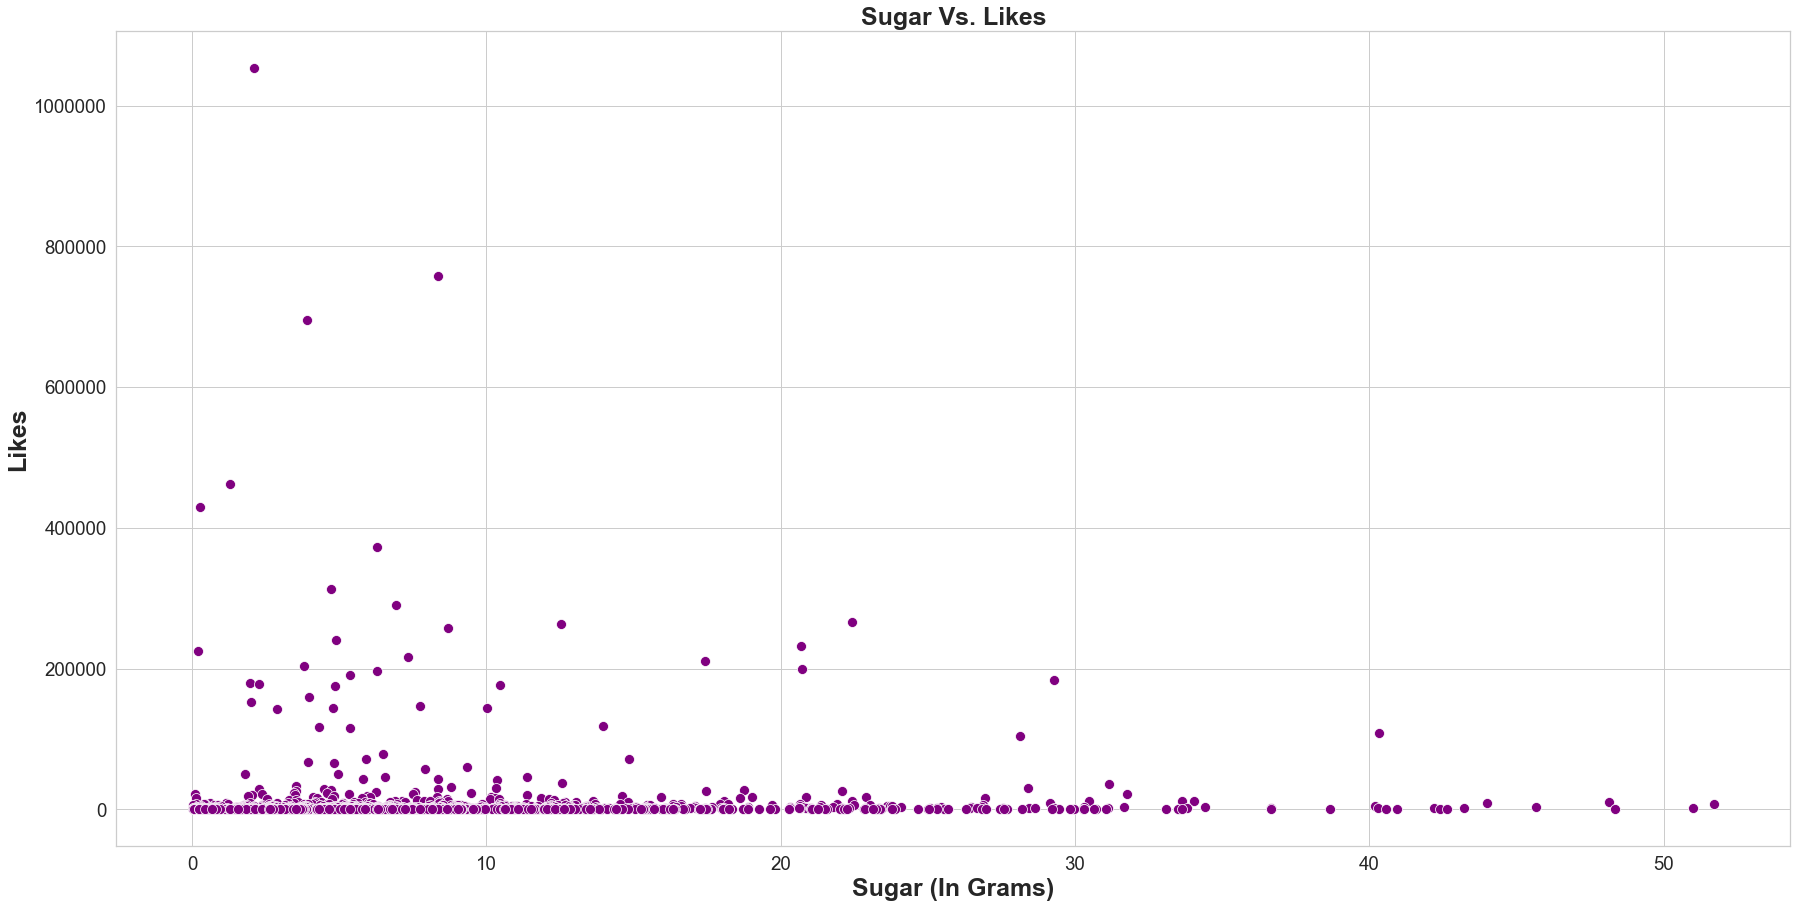

In [167]:
#scatterplot of "sugar" vs "aggregatelikes"

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="sugar", y="aggregatelikes", color='purple', s=100, data=df)
plt.xlabel('Sugar (In Grams)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Sugar Vs. Likes', fontsize=25, weight = 'bold')
plt.show()

# plt.savefig('sugar_versus_likes.pdf', dpi=300)

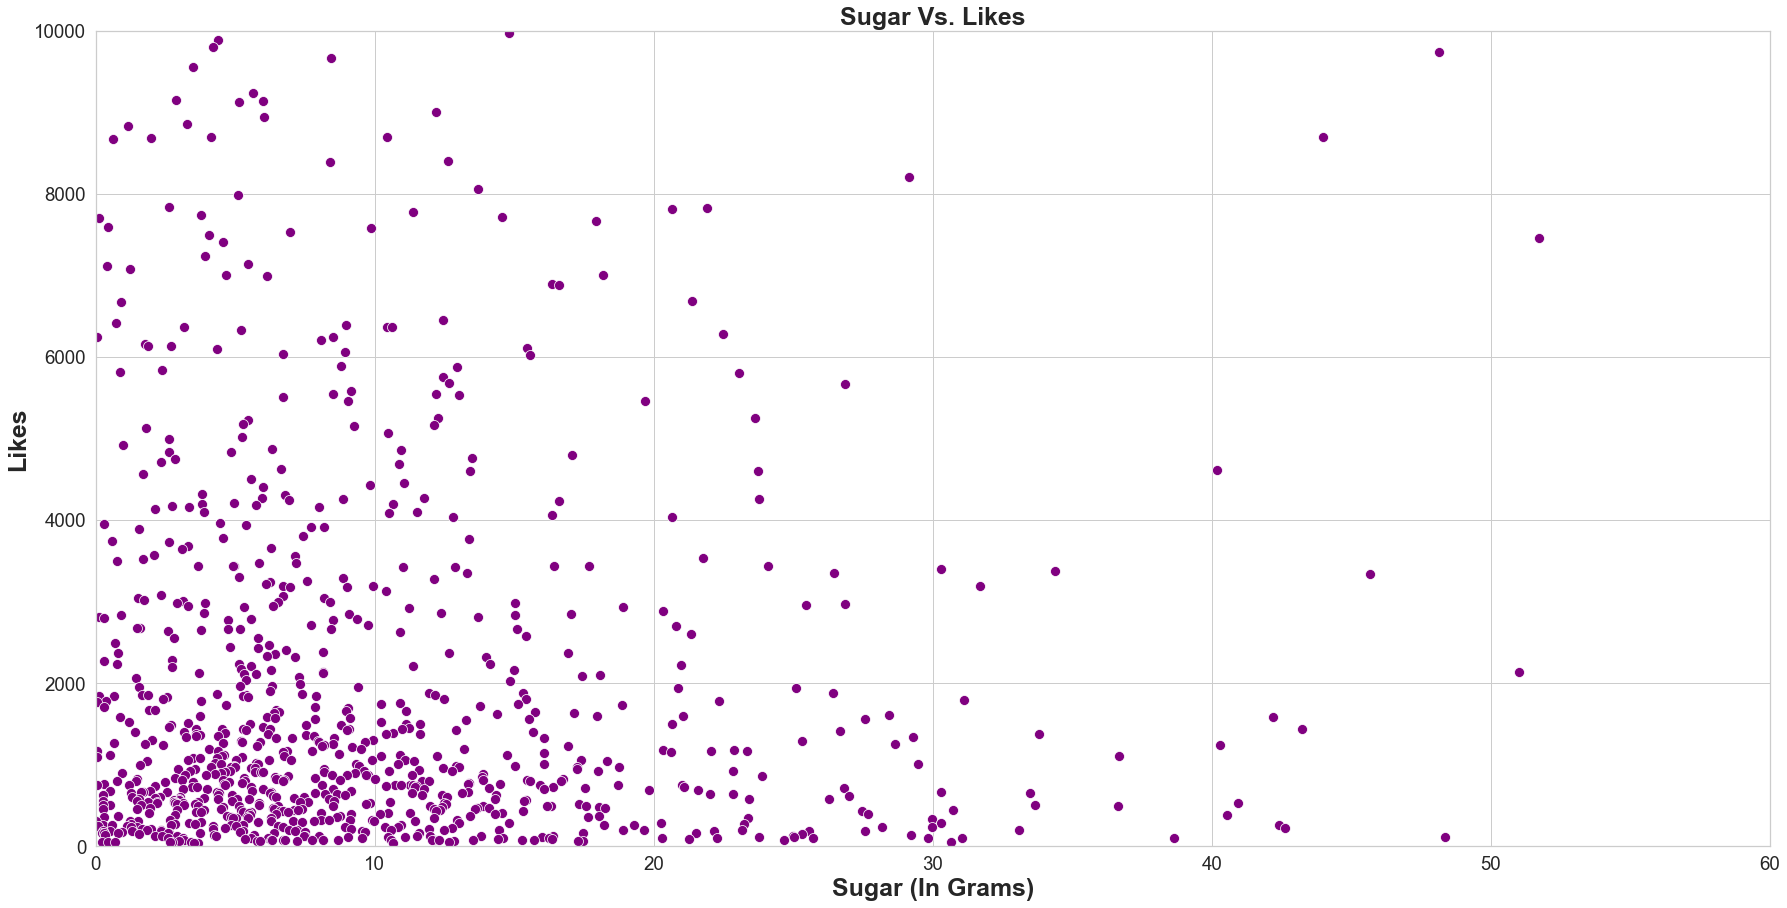

In [168]:
#scatterplot of "sugar" vs "aggregatelikes" with y less than 10,000

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="sugar", y="aggregatelikes", color='purple', s=100, data=df)
plt.xlabel('Sugar (In Grams)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Sugar Vs. Likes', fontsize=25, weight = 'bold')

#the plot of Sugar Vs. Likes looks very different when "Likes" (y-axis) is less than 10,000 per recipe
plt.axis([0,60,0,10000])
plt.show()

# plt.savefig('sugar_versus_likes_10000.pdf', dpi=300)

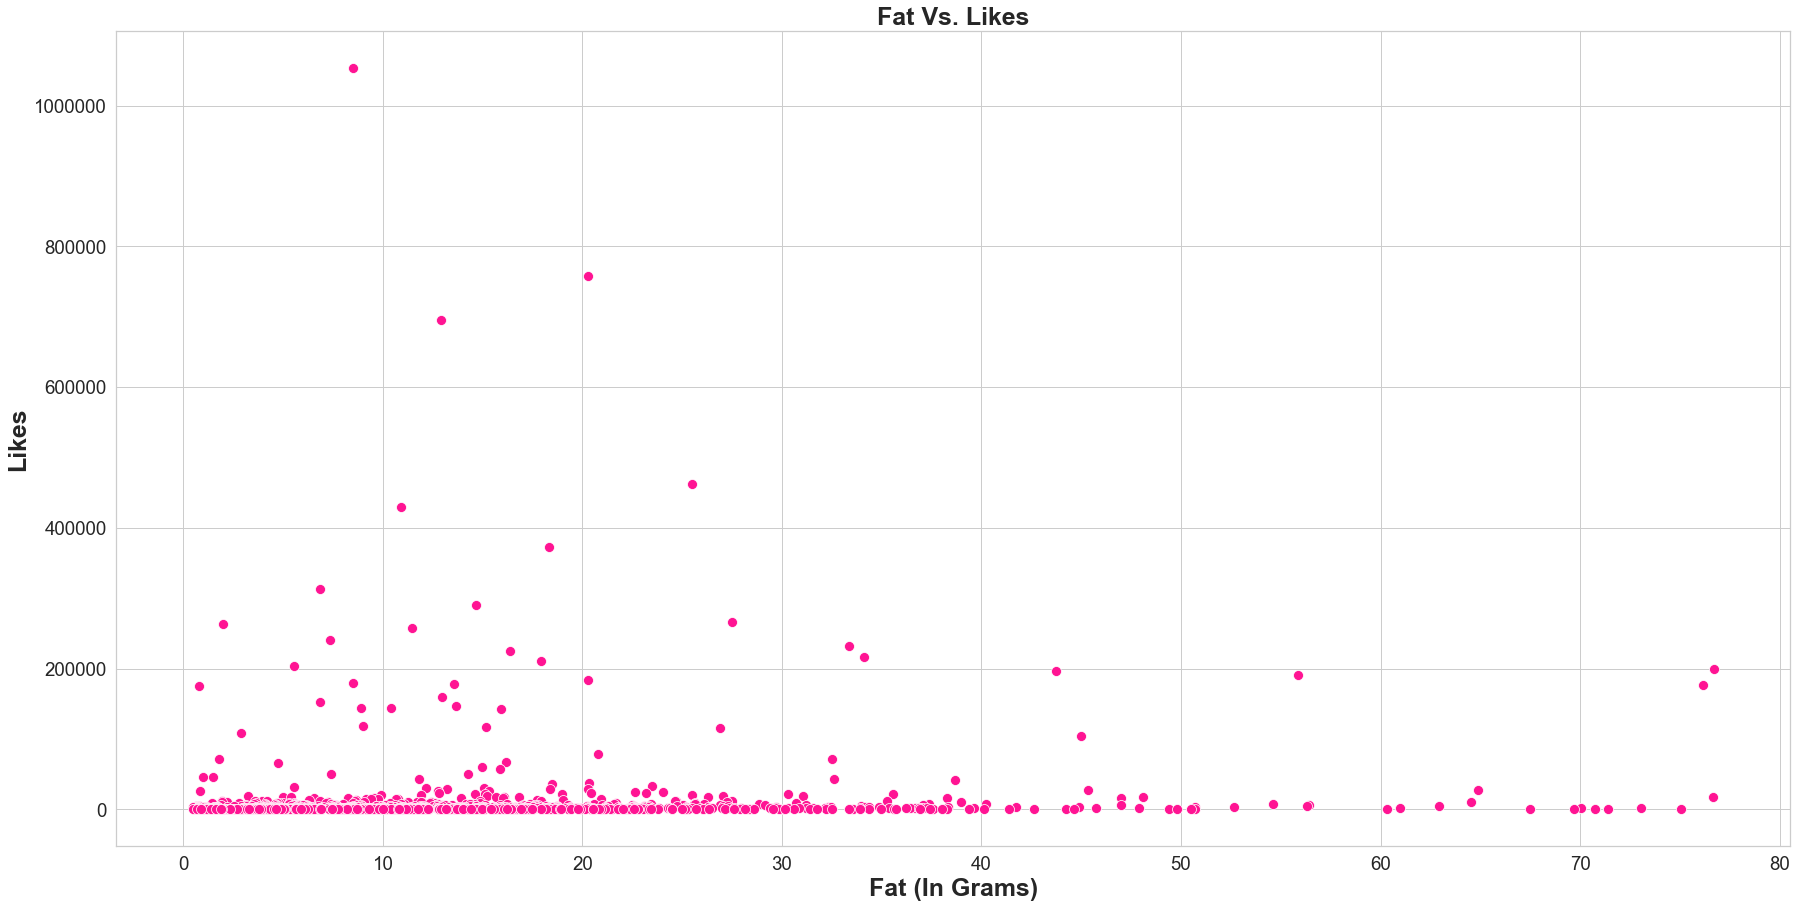

In [169]:
#scatterplot of "fat" vs "aggregatelikes"

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="fat", y="aggregatelikes", color='deeppink', s=100, data=df)
plt.xlabel('Fat (In Grams)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Fat Vs. Likes', fontsize=25, weight = 'bold')
plt.show()

# plt.savefig('fat_versus_likes.pdf', dpi=300)

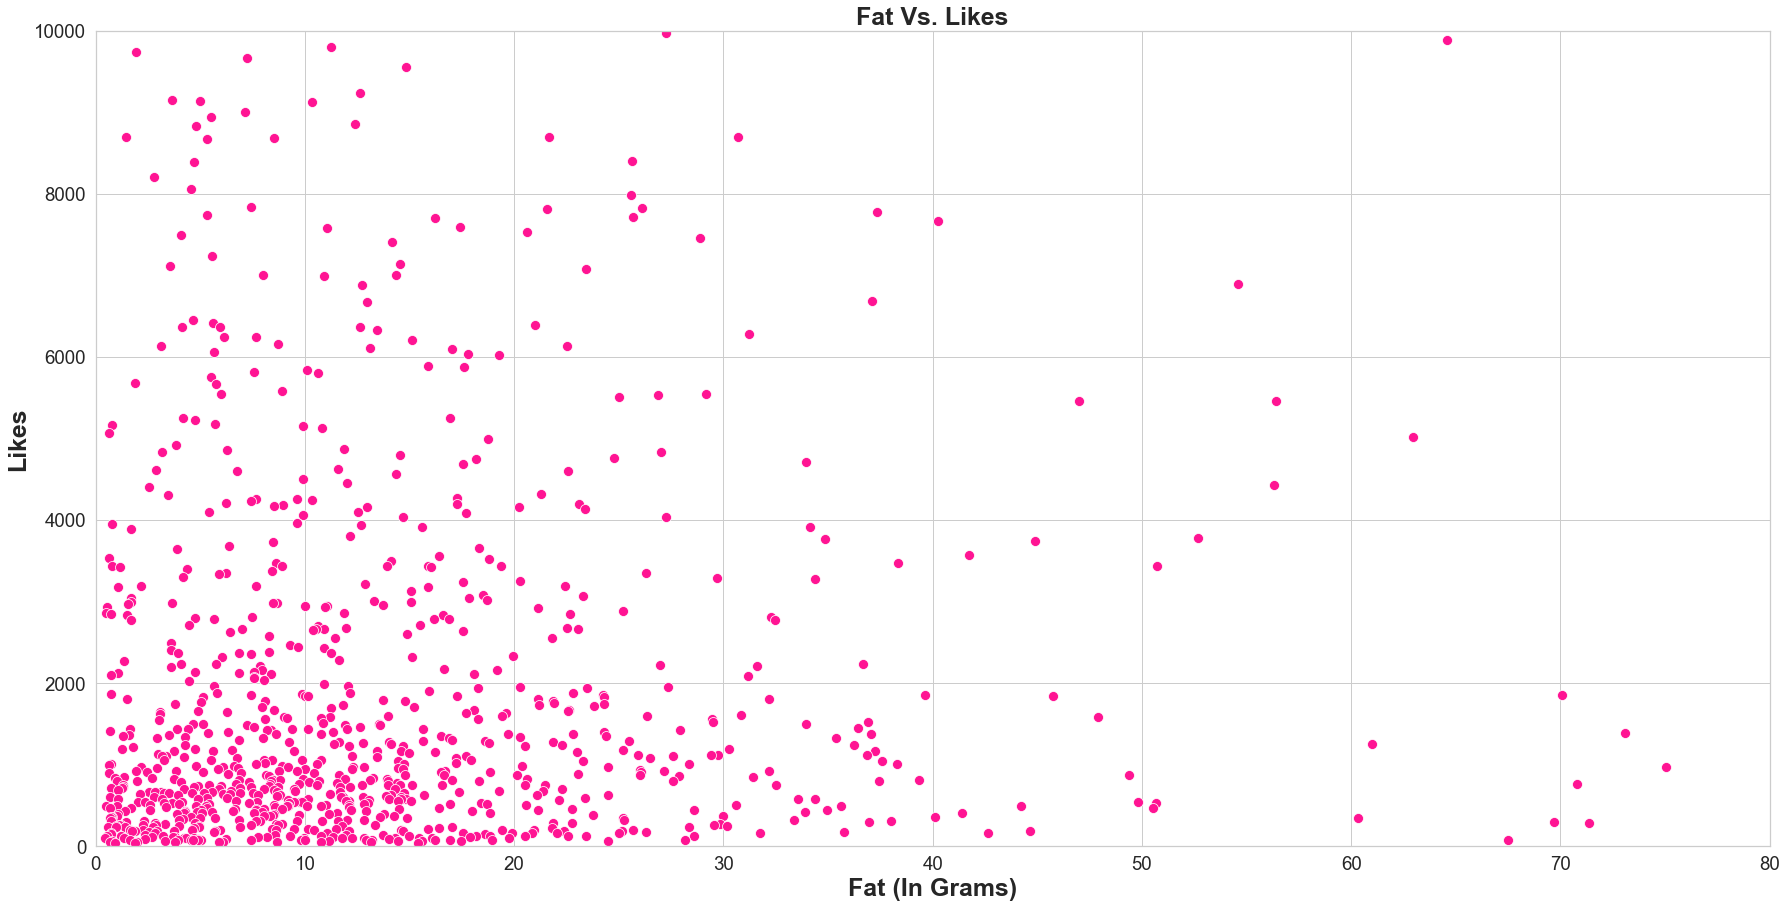

In [170]:
#scatterplot of "fat" vs "aggregatelikes" with y less than 10,000

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="fat", y="aggregatelikes", color='deeppink', s=100, data=df)
plt.xlabel('Fat (In Grams)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Fat Vs. Likes', fontsize=25, weight = 'bold')

#the plot of Fat Vs. Likes looks very different when "Likes" (y-axis) is less than 10,000 per recipe
plt.axis([0,80,0,10000])
plt.show()

# plt.savefig('fat_versus_likes_10000.pdf', dpi=300)

In [101]:
df.columns

Index(['aggregatelikes', 'analyzedinstructions', 'dairyfree', 'diets', 'dishtypes', 'extendedingredients', 'glutenfree', 'healthscore', 'id', 'ketogenic', 'lowfodmap', 'num_ingredients', 'priceperserving', 'readyinminutes', 'servings', 'spoonacularscore', 'spoonacularsourceurl', 'sustainable', 'title', 'vegan', 'vegetarian', 'veryhealthy', 'verypopular', 'weightwatchersmartpoints', 'whole30', 'calories', 'fat', 'saturated_fat', 'carbohydrates', 'sugar', 'cholesterol', 'sodium', 'protein', 'vitamin_k', 'vitamin_a', 'vitamin_c', 'manganese', 'folate', 'fiber', 'copper', 'magnesium', 'phosphorus', 'vitamin_b6', 'potassium', 'vitamin_b1', 'iron', 'vitamin_b2', 'vitamin_e', 'zinc', 'vitamin_b5', 'vitamin_b3', 'calcium', 'selenium'], dtype='object')

In [130]:
df_predictors = df[['readyinminutes', 'calories', 'priceperserving', 'fat', 'saturated_fat', 'carbohydrates', 'sugar', 'cholesterol', 'sodium', 'protein', 'vitamin_k', 'vitamin_a', 'vitamin_c', 'manganese', 'folate', 'fiber', 'copper', 'magnesium', 'phosphorus', 'vitamin_b6', 'potassium', 'vitamin_b1', 'iron', 'vitamin_b2', 'vitamin_e', 'zinc', 'vitamin_b5', 'vitamin_b3', 'calcium', 'selenium']]
df_non_nutrients = df[['readyinminutes', 'calories', 'priceperserving']]

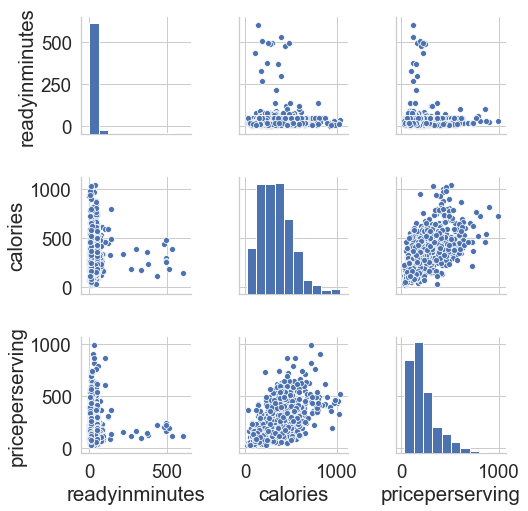

In [134]:
#
sns.pairplot(df_non_nutrients);
plt.show()

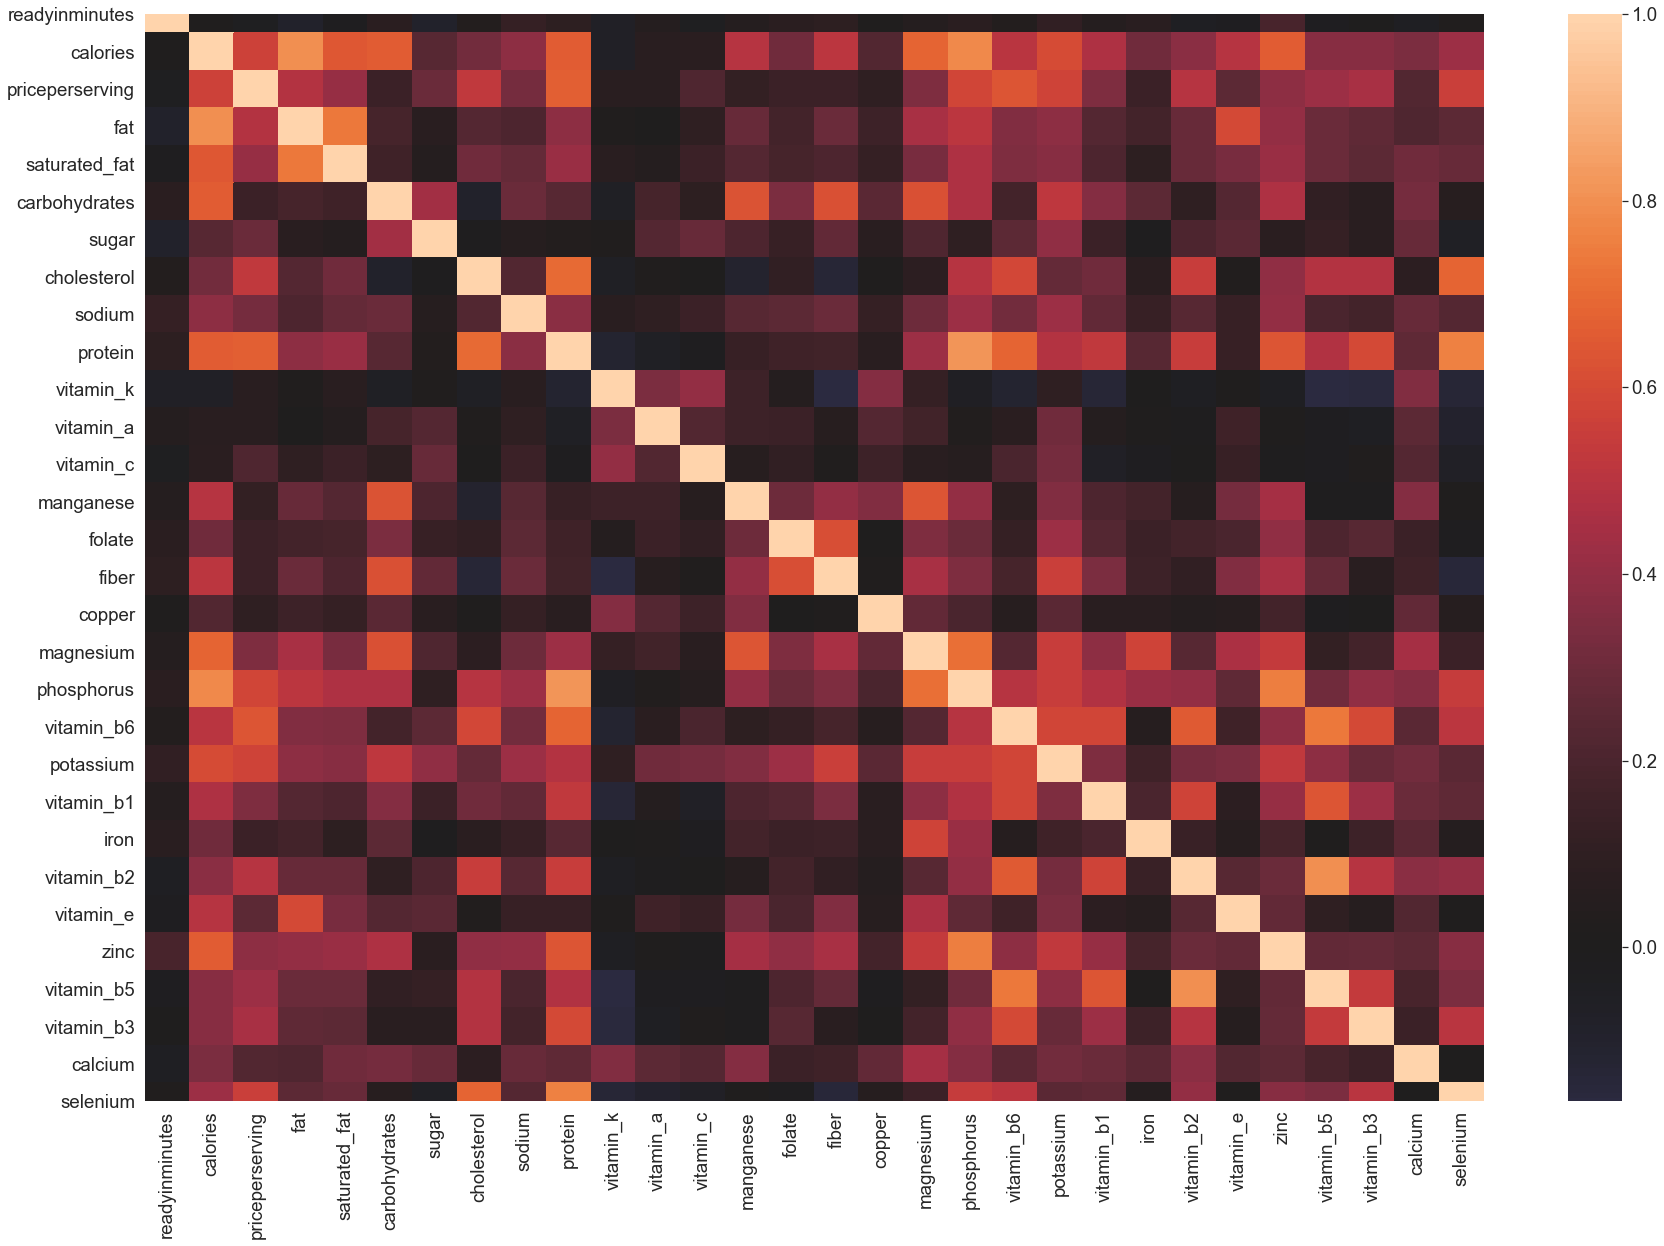

In [128]:
fig, ax = plt.subplots()
fig.set_size_inches(30,20)
ax = sns.heatmap(df_predictors.corr(), center=0);
plt.show()

In [141]:
multicollinearity = df_predictors.corr()
multicollinearity

,readyinminutes,calories,priceperserving,fat,saturated_fat,carbohydrates,sugar,cholesterol,sodium,protein,vitamin_k,vitamin_a,vitamin_c,manganese,folate,fiber,copper,magnesium,phosphorus,vitamin_b6,potassium,vitamin_b1,iron,vitamin_b2,vitamin_e,zinc,vitamin_b5,vitamin_b3,calcium,selenium
readyinminutes,1.000000,0.013461,-0.035679,-0.088153,-0.021241,0.072840,-0.086058,0.036858,0.117242,0.087635,-0.062566,0.043032,-0.034906,0.041313,0.075156,0.089210,0.008945,0.040481,0.080238,0.032238,0.105171,0.045822,0.065169,-0.044341,-0.024671,0.191465,-0.027798,0.006628,-0.039585,0.021270
calories,0.013461,1.000000,0.564000,0.801634,0.644898,0.656926,0.241636,0.321874,0.384292,0.661619,-0.065913,0.065104,0.075616,0.494776,0.309744,0.510897,0.218289,0.685983,0.784476,0.501944,0.608152,0.468838,0.304288,0.379630,0.497926,0.661214,0.368137,0.371289,0.343899,0.428935
priceperserving,-0.035679,0.564000,1.000000,0.486845,0.409234,0.144754,0.295587,0.523951,0.322394,0.669111,0.070160,0.071129,0.213202,0.115894,0.143845,0.146103,0.102672,0.349723,0.585288,0.635993,0.571408,0.346185,0.142613,0.494156,0.256682,0.381764,0.427575,0.456813,0.226383,0.562208
fat,-0.088153,0.801634,0.486845,1.000000,0.732092,0.181314,0.067108,0.232040,0.212501,0.383659,0.022140,0.002197,0.095499,0.285451,0.174930,0.298798,0.152467,0.455425,0.509733,0.355446,0.381881,0.231192,0.177206,0.290075,0.596689,0.399902,0.296307,0.263825,0.215798,0.253949
saturated_fat,-0.021241,0.644898,0.409234,0.732092,1.000000,0.162709,0.041339,0.309991,0.274568,0.421801,0.071479,0.041413,0.145610,0.234829,0.183055,0.209822,0.118675,0.330785,0.473396,0.351028,0.374176,0.210407,0.088022,0.282802,0.328901,0.417605,0.292768,0.257431,0.306710,0.285053
carbohydrates,0.072840,0.656926,0.144754,0.181314,0.162709,1.000000,0.443128,-0.087274,0.298784,0.244515,-0.055607,0.186796,0.086748,0.622473,0.338393,0.619417,0.246180,0.617883,0.474049,0.177120,0.516690,0.363030,0.251032,0.094623,0.231566,0.473320,0.111330,0.062991,0.323911,0.061679
sugar,-0.086058,0.241636,0.295587,0.067108,0.041339,0.443128,1.000000,-0.013157,0.052658,0.030931,0.022251,0.228924,0.287033,0.205180,0.133556,0.269134,0.067488,0.216444,0.099508,0.249406,0.398761,0.148699,-0.005874,0.205949,0.247839,0.079764,0.118829,0.065745,0.284948,-0.057154
cholesterol,0.036858,0.321874,0.523951,0.232040,0.309991,-0.087274,-0.013157,1.000000,0.224730,0.697241,-0.052179,0.017700,0.002186,-0.101971,0.106805,-0.134281,0.010466,0.081233,0.492804,0.590602,0.274022,0.304237,0.073245,0.547171,0.027200,0.397305,0.485858,0.487380,0.081032,0.679347
sodium,0.117242,0.384292,0.322394,0.212501,0.274568,0.298784,0.052658,0.224730,1.000000,0.378973,0.063432,0.102987,0.140159,0.242272,0.253416,0.294802,0.119338,0.302808,0.428380,0.315601,0.428432,0.267399,0.130274,0.239860,0.135272,0.399890,0.195185,0.172276,0.285051,0.235214
protein,0.087635,0.661619,0.669111,0.383659,0.421801,0.244515,0.030931,0.697241,0.378973,1.000000,-0.114724,-0.051291,-0.021724,0.128369,0.160977,0.167593,0.068740,0.422321,0.813306,0.679781,0.485885,0.529482,0.242764,0.552150,0.133851,0.633656,0.484800,0.597603,0.264135,0.755306


In [156]:
#check for multicollinearity - consider VIF as well.

for column in multicollinearity:
    for x in multicollinearity[column]:
        if x > .7 and x!=1:
            print(column, multicollinearity.loc[multicollinearity[column]==x].index.values, x)
        elif x < -.7 and x!=-1:
            print(column, multicollinearity.loc[multicollinearity[column]==x].index.values, x)

calories ['fat'] 0.8016342998701215
calories ['phosphorus'] 0.7844764338100276
fat ['calories'] 0.8016342998701215
fat ['saturated_fat'] 0.7320917163974299
saturated_fat ['fat'] 0.7320917163974299
protein ['phosphorus'] 0.8133061517047712
protein ['selenium'] 0.7553063521090513
magnesium ['phosphorus'] 0.7092268847836799
phosphorus ['calories'] 0.7844764338100276
phosphorus ['protein'] 0.8133061517047712
phosphorus ['magnesium'] 0.7092268847836799
phosphorus ['zinc'] 0.7507058933868221
vitamin_b6 ['vitamin_b5'] 0.7318854395891753
vitamin_b2 ['vitamin_b5'] 0.8024945877045959
zinc ['phosphorus'] 0.7507058933868221
vitamin_b5 ['vitamin_b6'] 0.7318854395891753
vitamin_b5 ['vitamin_b2'] 0.8024945877045959
selenium ['protein'] 0.7553063521090513
